In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [73]:
#importing the file and datetime and pandas
from datetime import datetime as dt
import pandas as pd
%matplotlib inline
url = "https://data.sfgov.org/api/views/5cei-gny5/rows.csv?accessType=DOWNLOAD"
evictions = pd.read_csv(url, parse_dates=['File Date'])


In [74]:
#making the column names look pretty
evictions.columns = evictions.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '')


In [75]:
#look at the names and the values
evictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40178 entries, 0 to 40177
Data columns (total 29 columns):
eviction_id                           40178 non-null object
address                               40178 non-null object
city                                  40176 non-null object
state                                 40176 non-null object
eviction_notice_source_zipcode        39495 non-null object
file_date                             40178 non-null datetime64[ns]
non_payment                           40178 non-null bool
breach                                40178 non-null bool
nuisance                              40178 non-null bool
illegal_use                           40178 non-null bool
failure_to_sign_renewal               40178 non-null bool
access_denial                         40178 non-null bool
unapproved_subtenant                  40178 non-null bool
owner_move_in                         40178 non-null bool
demolition                            40178 non-null bool
c

In [76]:
#check if there are duplicate values
evictions.groupby(by='eviction_id').filter(lambda x: len(x)>1)


,eviction_id,address,city,state,eviction_notice_source_zipcode,file_date,non_payment,breach,nuisance,illegal_use,...,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,constraints_date,supervisor_district,neighborhoods__analysis_boundaries,location


In [77]:
#check if the nunique matches the row count
evictions.eviction_id.nunique()


40178

In [78]:
#check the zipcodes
evictions['eviction_notice_source_zipcode'].describe()


count     39495.0
unique       70.0
top       94110.0
freq       4052.0
Name: eviction_notice_source_zipcode, dtype: float64

In [79]:
#check the unique values in the zipcodes
evictions['eviction_notice_source_zipcode'].unique()


array([94121.0, 94122.0, 94110.0, 94109.0, 94131.0, 94118.0, 94123.0,
       94124.0, 94102.0, 94132.0, 94114.0, 94103.0, 94133.0, 94117.0,
       94112.0, 94116.0, 94115.0, 94105.0, 94127.0, 94134.0, 94107.0,
       94108.0, 94158.0, nan, 94111.0, 94130.0, 94129.0, 94104.0, 94159.0,
       94101.0, 94135.0, 94144.0, '94109', '94133', '94112', '94118',
       '94117', '94121', '94131', '94102', '94123', '94115', '94116',
       '94103', '94122', '94132', '94127', '94114', '94110', '94111',
       '94134', '94105', '94124', '94107', '94108', '94104', '94130',
       '94126', '941', '9411', '94', '9', '94113', '9413', '9412', '9410',
       '941 1', '91011', '941??', '9132', '94129'], dtype=object)

In [80]:
#fix zipcode one
evictions[evictions['eviction_notice_source_zipcode'] == '941 1']
evictions.at[35204, 'eviction_notice_source_zipcode'] = '941'


In [81]:
#fix zipcode two
evictions[evictions['eviction_notice_source_zipcode'] == '941??']
evictions.at[35414, 'eviction_notice_source_zipcode'] = '941'


In [82]:
#convert the zipcode field into a string and then an integer
evictions['eviction_notice_source_zipcode'] = evictions['eviction_notice_source_zipcode'].astype(float).fillna(0.0)
evictions['eviction_notice_source_zipcode'] = evictions['eviction_notice_source_zipcode'].astype(int)


In [83]:
#check what the zipcode field looks like
evictions.eviction_notice_source_zipcode.head(10)


0    94121
1    94122
2    94110
3    94109
4    94109
5    94110
6    94131
7    94122
8    94118
9    94122
Name: eviction_notice_source_zipcode, dtype: int64

In [84]:
#get all the values that are lower than 94101 which is the lowest real zipcode
missing = evictions.loc[evictions['eviction_notice_source_zipcode'] < 94101, ['address']]


In [85]:
#check the number of missing values
missing.count()


address    822
dtype: int64

In [86]:
#check the info field for the names of the reason fields
evictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40178 entries, 0 to 40177
Data columns (total 29 columns):
eviction_id                           40178 non-null object
address                               40178 non-null object
city                                  40176 non-null object
state                                 40176 non-null object
eviction_notice_source_zipcode        40178 non-null int64
file_date                             40178 non-null datetime64[ns]
non_payment                           40178 non-null bool
breach                                40178 non-null bool
nuisance                              40178 non-null bool
illegal_use                           40178 non-null bool
failure_to_sign_renewal               40178 non-null bool
access_denial                         40178 non-null bool
unapproved_subtenant                  40178 non-null bool
owner_move_in                         40178 non-null bool
demolition                            40178 non-null bool
ca

In [87]:
#group by the reason fields, get the frequency for every combination and sort high to low
evictions.groupby(['non_payment', 'breach', 'nuisance', 'illegal_use', 'failure_to_sign_renewal', 'access_denial', 'unapproved_subtenant', 'owner_move_in', 'demolition', 'capital_improvement', 'substantial_rehab', 'ellis_act_withdrawal', 'condo_conversion', 'roommate_same_unit', 'other_cause', 'late_payments', 'lead_remediation', 'development', 'good_samaritan_ends']).size().reset_index().sort_values(0, ascending=False).head(10)


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,substantial_rehab,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,0
25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,10018
69,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8007
48,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5643
12,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,3867
99,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2211
16,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1496
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1474
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1261
7,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1211
19,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1129


In [88]:
#get it into a variable
reasons = evictions.groupby(['non_payment', 'breach', 'nuisance', 'illegal_use', 'failure_to_sign_renewal', 'access_denial', 'unapproved_subtenant', 'owner_move_in', 'demolition', 'capital_improvement', 'substantial_rehab', 'ellis_act_withdrawal', 'condo_conversion', 'roommate_same_unit', 'other_cause', 'late_payments', 'lead_remediation', 'development', 'good_samaritan_ends'], as_index=False).size().reset_index().sort_values(0, ascending=False)


In [89]:
#rename the frequency column
reasons.rename(columns={0 : 'frequency'}, inplace=True)


In [90]:
#add a true_count field that shows how many reasons are listed for the eviction
reasons['true_count'] = (reasons[['non_payment', 'breach', 'nuisance', 'illegal_use', 'failure_to_sign_renewal', 'access_denial', 'unapproved_subtenant', 'owner_move_in', 'demolition', 'capital_improvement', 'substantial_rehab', 'ellis_act_withdrawal', 'condo_conversion', 'roommate_same_unit', 'other_cause', 'late_payments', 'lead_remediation', 'development', 'good_samaritan_ends']] == True).sum(axis=1)


In [91]:
#sort on the true_count for the lowest values to see how many missing values there are
reasons.sort_values('true_count').head(10)


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,321,0
25,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,10018,1
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,8,1
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,8,1
38,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,69,1
10,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,114,1
36,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,210,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,362,1
42,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,533,1
31,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,656,1


In [92]:
#sort on the highest values to see which records have the most reasons
reasons.sort_values('true_count', ascending=False).head(10)


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count
96,False,True,True,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,1,5
93,False,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,1,4
122,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,4
59,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,1,4
66,False,False,True,True,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,1,4
97,False,True,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,1,4
98,False,True,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,9,4
119,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,4
121,True,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
92,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,1,4


In [93]:
#check the top reasons to see how many true counts they have
reasons.head(10)


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count
25,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,10018,1
69,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,8007,1
48,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,5643,1
12,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,3867,1
99,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2211,1
16,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,1496,1
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,1474,1
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,1261,1
7,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,1211,1
19,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,1129,1


In [94]:
#add the true_count to the evictions field as well
evictions['true_count'] = (evictions[['non_payment', 'breach', 'nuisance', 'illegal_use', 'failure_to_sign_renewal', 'access_denial', 'unapproved_subtenant', 'owner_move_in', 'demolition', 'capital_improvement', 'substantial_rehab', 'ellis_act_withdrawal', 'condo_conversion', 'roommate_same_unit', 'other_cause', 'late_payments', 'lead_remediation', 'development', 'good_samaritan_ends']] == True).sum(axis=1)


In [95]:
#check the records with no reasons
evictions[evictions.true_count == 0].reset_index().sort_values('true_count', ascending=False).head(10)


,index,eviction_id,address,city,state,eviction_notice_source_zipcode,file_date,non_payment,breach,nuisance,...,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,constraints_date,supervisor_district,neighborhoods__analysis_boundaries,location,true_count
0,216,M172755,1400 Block Of Mcallister Street,San Francisco,CA,94115,2017-11-01,False,False,False,...,False,False,False,False,False,NaN,5.0,Western Addition,"(37.77816383880218, -122.4358853193284)",0
161,20372,S000423,800 Block Of 14th Street,San Francisco,CA,0,1997-10-01,False,False,False,...,False,False,False,False,False,NaN,8.0,Castro/Upper Market,"(37.767507076087114, -122.43173994211207)",0
219,28951,E982286,300 Block Of Scott Street,San Francisco,CA,94117,1998-09-25,False,False,False,...,False,False,False,False,False,NaN,5.0,Haight Ashbury,"(37.77289055160434, -122.43558909120165)",0
218,28727,M2K2018,2000 Block Of Bush Street,San Francisco,CA,94115,2000-10-05,False,False,False,...,False,False,False,False,False,NaN,5.0,Pacific Heights,"(37.787390085206, -122.43100178067202)",0
217,28694,M101625,100 Block Of Broderick Street,San Francisco,CA,94117,2010-11-09,False,False,False,...,False,False,False,False,False,NaN,5.0,Haight Ashbury,"(37.771514703010105, -122.43887242213414)",0
216,28512,RE02355,1000 Block Of Dolores Street,San Francisco,CA,0,1997-07-22,False,False,False,...,False,False,False,False,False,NaN,8.0,Mission,"(37.752643924449465, -122.4250877782395)",0
215,28464,M020362,400 Block Of Valencia Street,San Francisco,CA,94103,2002-03-26,False,False,False,...,False,False,False,False,False,NaN,8.0,Mission,"(37.76612594583041, -122.42207304920552)",0
214,28459,M051729,300 Block Of South Van Ness,San Francisco,CA,94102,2005-08-26,False,False,False,...,False,False,False,False,False,NaN,9.0,Mission,"(37.76760099952863, -122.41779278798714)",0
213,28416,M2K2553,1400 Block Of Shafter Avenue,San Francisco,CA,94124,2000-12-26,False,False,False,...,False,False,False,False,False,NaN,10.0,Bayview Hunters Point,"(37.72940484926397, -122.38795985825239)",0
212,28375,M030654,2800 Block Of Sacramento Street,San Francisco,CA,94115,2002-05-10,False,False,False,...,False,False,False,False,False,NaN,2.0,Pacific Heights,"(37.78904760859322, -122.43978096945591)",0


In [96]:
#put it into a variable
no_reason = evictions[evictions.true_count == 0].reset_index().sort_values('true_count', ascending=False)


In [97]:
#check how many empty records there are
no_reason.eviction_id.nunique()


321

In [98]:
#function to get the name of the column where the reason is true
def get_name(row):
    b = reasons.loc[row.name] == True
    item = []
    for key, value in b.items():
        if key != 'frequency' and key != 'true_count':
            if value == True:
                item.append(key)

    b['value'] = item
    return b['value']


In [99]:
#same but for the evictions dataframe
def evic_name(row):
    b = evictions.loc[row.name] == True
    item = []
    for key, value in b.items():
        if key != 'frequency' and key != 'true_count':
            if value == True:
                item.append(key)

    b['value'] = item
    return b['value']


In [100]:
#add the reason to the dataframe reasons
reasons['reason'] = reasons.apply(get_name, axis=1)


In [101]:
#add the reason to the dataframe evictions
evictions['reason'] = evictions.apply(evic_name, axis=1)


In [102]:
#clean the reason column
reasons['reason'] = reasons['reason'].astype(str)
reasons.reason = reasons.reason.str.strip('[').str.strip(']').str.replace("'", "").str.strip()


In [103]:
#clean the reason column
evictions['reason'] = evictions['reason'].astype(str)
evictions.reason = evictions.reason.str.strip('[').str.strip(']').str.replace("'", "").str.strip()


In [104]:
#check what it looks like
reasons.head()


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count,reason
25,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,10018,1,owner_move_in
69,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,8007,1,breach
48,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,5643,1,nuisance
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3867,1,ellis_act_withdrawal
99,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2211,1,non_payment


In [105]:
#check what it looks like
reasons.tail()


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count,reason
92,False,True,True,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,1,4,"breach, nuisance, access_denial, late_payments"
64,False,False,True,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,1,3,"nuisance, illegal_use, other_cause"
33,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,1,2,"unapproved_subtenant, other_cause"
95,False,True,True,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,1,4,"breach, nuisance, illegal_use, late_payments"
61,False,False,True,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,1,3,"nuisance, access_denial, late_payments"


In [106]:
#get a new variable with just the reason and the frequency
top_reasons = reasons[['reason', 'frequency']]


In [107]:
#check what it looks like
top_reasons.head(10)


,reason,frequency
25,owner_move_in,10018
69,breach,8007
48,nuisance,5643
12,ellis_act_withdrawal,3867
99,non_payment,2211
16,capital_improvement,1496
4,late_payments,1474
5,other_cause,1261
7,roommate_same_unit,1211
19,demolition,1129


[Text(0,0,'owner_move_in'),
 Text(0,0,'breach'),
 Text(0,0,'nuisance'),
 Text(0,0,'ellis_act_withdrawal'),
 Text(0,0,'non_payment'),
 Text(0,0,'capital_improvement'),
 Text(0,0,'late_payments'),
 Text(0,0,'other_cause'),
 Text(0,0,'roommate_same_unit'),
 Text(0,0,'demolition')]

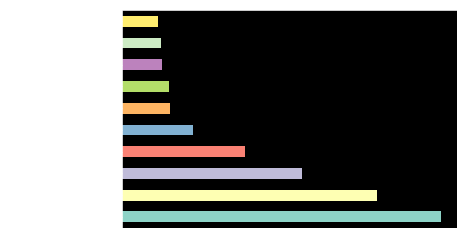

In [108]:
#make a chart of the top ten reasons of all time
chart = top_reasons.head(10).frequency.plot.barh()
chart.set_yticklabels(top_reasons.reason)


In [109]:
#check the date field in the evictions dataframe
evictions.file_date.describe()


count                   40178
unique                   5460
top       2012-08-16 00:00:00
freq                      240
first     1997-01-02 00:00:00
last      2019-01-29 00:00:00
Name: file_date, dtype: object

In [110]:
#setting the year column by extracting the year
evictions['year'] = pd.to_datetime(evictions['file_date'], format = '%Y,%m,%d').dt.year


In [111]:
#check if we have all the values from 1997-2019
evictions.year.unique()


array([2017, 2013, 1999, 1997, 2014, 2006, 2004, 2012, 2001, 2002, 2000,
       1998, 2016, 2010, 2009, 2008, 2007, 2005, 2003, 2015, 2011, 2018,
       2019])

In [112]:
#clean up the reason column again because I got a weird error here
evictions['reason'] = evictions['reason'].astype(str)
evictions.reason = evictions.reason.str.strip('[').str.strip(']').str.replace("'", "").str.strip()


In [113]:
#make a new variablegrouped by the reason and the year
reason_year = evictions.groupby(['reason', 'year']).size().reset_index().sort_values(0, ascending=False)


In [114]:
#check the head
reason_year.head()


,reason,year,0
924,owner_move_in,1998,1373
923,owner_move_in,1997,1057
926,owner_move_in,2000,883
925,owner_move_in,1999,779
927,owner_move_in,2001,694


In [115]:
#rename frequency column
reason_year.rename(columns={0 : 'frequency'}, inplace=True)


In [116]:
#get the sorted values, first by year then frequency
top_year = reason_year.sort_values(['year', 'frequency'], ascending=False)


In [117]:
#top for 2018
top_2018 = top_year[top_year.year == 2018]


In [118]:
#set reason as index
top_2018 = top_2018.set_index('reason')


In [119]:
#check the head
top_2018.head()


,year,frequency
reason,,
breach,2018,390
nuisance,2018,272
capital_improvement,2018,215
owner_move_in,2018,186
ellis_act_withdrawal,2018,157


In [120]:
#drop the year column
top_2018 = top_2018.drop(['year'], axis=1)


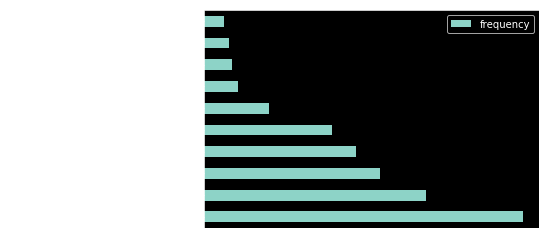

In [121]:
#plot
top_2018.head(10).plot.barh()


In [122]:
#get the values for nuisance over the years
top_nuisance = top_year[top_year.reason == 'nuisance']


In [123]:
#drop the reason
top_nuisance = top_nuisance.drop(['reason'], axis=1)


In [124]:
#drop 2019
top_nuisance = top_nuisance.drop([749])


In [125]:
#set year as index
top_nuisance = top_nuisance.set_index('year')


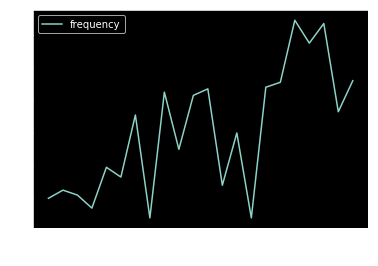

In [126]:
#plot
top_nuisance.plot()


In [127]:
#all the same but for breach
top_breach = top_year[top_year.reason == 'breach']


In [128]:
top_breach = top_breach.drop(['reason'], axis=1)


In [129]:
top_breach = top_breach.drop([75])


In [130]:
top_breach = top_breach.set_index('year')


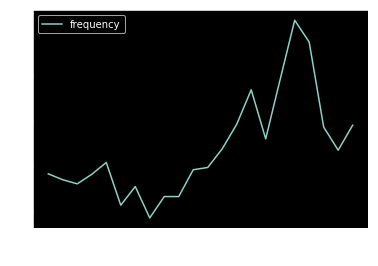

In [131]:
top_breach.plot()


In [132]:
#same but for owner
top_owner = top_year[top_year.reason == 'owner_move_in']


In [133]:
top_owner.sort_values('year')


,reason,year,frequency
923,owner_move_in,1997,1057
924,owner_move_in,1998,1373
925,owner_move_in,1999,779
926,owner_move_in,2000,883
927,owner_move_in,2001,694
928,owner_move_in,2002,469
929,owner_move_in,2003,318
930,owner_move_in,2004,305
931,owner_move_in,2005,223
932,owner_move_in,2006,194


In [134]:
top_owner = top_owner.drop(['reason'], axis=1)


In [135]:
top_owner = top_owner.drop([945])


In [136]:
top_owner.head()


,year,frequency
944,2018,186
943,2017,265
942,2016,342
941,2015,378
940,2014,275


In [137]:
top_owner = top_owner.set_index('year')


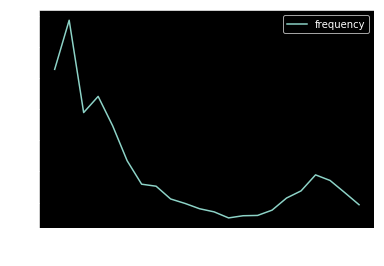

In [138]:
top_owner.plot()


In [139]:
#get top three reasons of all time
three_reasons = ['owner_move_in', 'breach', 'nuisance']


In [140]:
#make a list with those values
top_three = top_year[top_year.reason.isin(three_reasons)]


In [141]:
top_three = top_three.drop([75, 749, 945])


In [142]:
top_three.head(10)


,reason,year,frequency
74,breach,2018,390
748,nuisance,2018,272
944,owner_move_in,2018,186
73,breach,2017,335
943,owner_move_in,2017,265
747,nuisance,2017,253
72,breach,2016,386
942,owner_move_in,2016,342
746,nuisance,2016,307
71,breach,2015,573


In [143]:
#make a pivot table
top_pivot = top_three.pivot(index='year', columns='reason', values='frequency')


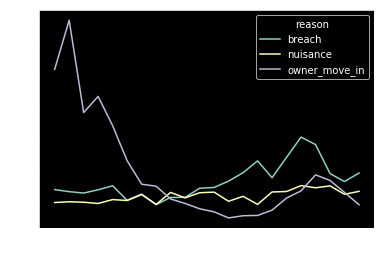

In [144]:
#plot
top_pivot.plot()